In [1]:
import pandas as pd

## Import data

In [2]:
# Import the data and convert the “Year” column to datetime stamp and set it as index.
# Drop the “city” column with only two columns left(Ottawa temperature and global temperature)
temp = pd.read_csv("concat table.csv", parse_dates=["year"], index_col= "year")
temp.drop('city', axis =1, inplace = True)

In [3]:
temp.head()

,ottawa_temp,global_temp
year,,
1750-01-01,4.47,8.72
1751-01-01,5.10,7.98
1752-01-01,-3.73,5.78
1753-01-01,3.90,8.39
1754-01-01,3.96,8.47


## Calculate moving average

In [4]:
# Create two columns for moving average in Ottawa and around the globe respectively.
# Drop the original temperature columns with only the moving average columns left.
temp['Ottawa'] = temp.iloc[:,0].rolling(window = 7).mean()
temp['Global'] = temp.iloc[:,1].rolling(window = 7).mean()
temp.drop(labels=['ottawa_temp', 'global_temp'], axis =1, inplace=True)

In [7]:
temp.head(20)

,Ottawa,Global
year,,
1750-01-01,NaN,NaN
1751-01-01,NaN,NaN
1752-01-01,NaN,NaN
1753-01-01,NaN,NaN
1754-01-01,NaN,NaN
1755-01-01,NaN,NaN
1756-01-01,2.654286,8.078571
1757-01-01,2.470000,8.121429
1758-01-01,2.110000,7.944286


## Plot the data

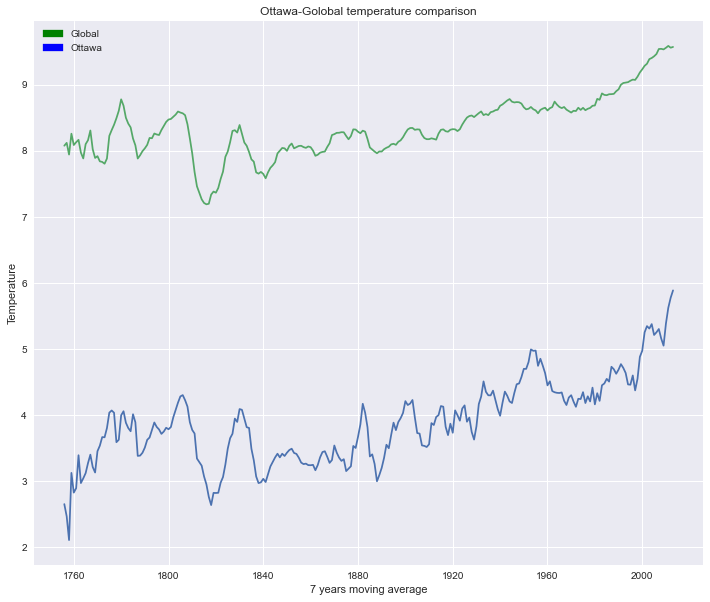

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
fig, axes = plt.subplots(figsize = (12,10))
axes.plot(temp)
axes.set_xlabel('7 years moving average')
axes.set_ylabel('Temperature')
axes.set_title('Ottawa-Golobal temperature comparison')
green_patch = mpatches.Patch(label = 'Global',color = 'green' )
blue_patch = mpatches.Patch(label = 'Ottawa', color = 'blue')
plt.legend(handles = [green_patch, blue_patch])
plt.show()
